In [1]:
import numpy as np
import matplotlib.pyplot as plt

Race A: -1, Race B: 1, Vacant spot = 0

Step 1: Initialization of lattice

In [2]:
#Dimension of lattice
lx = 5
ly = 5

#Fraction of each races
fa = 0.11
fb = 0.53
f0 = fa + fb

if fa + fb > 1:
    print('ERROR: Total fraction larger than 1')
    exit()

#initialize lattice: randomly assign fractions of population - assign numbers from 0 to 1
model = np.random.random((lx,ly))

#go through each element in the lattice, to assign if element is Race A,B or vacant
#Race b: 1, Race A: -1, Vacant spot: 0
for i in range(0,lx):
    for j in range(0,ly):
        #race A
        if model[i,j] <= fa:
            model[i,j] = -1
        #race B
        elif model[i,j] > f0:
            model[i,j] = 0
        #vacant
        else:
            model[i,j] = 1

In [3]:
model

array([[ 0.,  1.,  0.,  1.,  1.],
       [ 1.,  1.,  1.,  1., -1.],
       [ 1., -1.,  1.,  0.,  1.],
       [ 1.,  1.,  0., -1.,  0.],
       [ 0.,  0.,  1.,  1.,  1.]])

Step 2: after initialization, go through 1 iteration using the condition: \
Choose 1 element to reproduce (following probabilities discussed in class), and if it reproduces, choose closest vacant spot to put new element \
Choose 1 element to die (following probabilities discussed in class), convert element to vacant spot

0
vacant = 7
1
vacant = 8
2
vacant = 9
3
vacant = 8
4
vacant = 8
5
vacant = 7
6
vacant = 7


<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

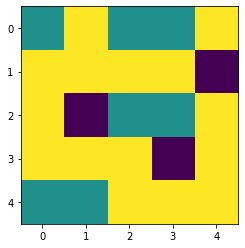

7
vacant = 7
8
vacant = 7
9
vacant = 7
10
vacant = 6
11
vacant = 7
12
vacant = 7
13
vacant = 7
14
vacant = 6
15
vacant = 5
16
vacant = 6
17
vacant = 5
18
vacant = 6
19
vacant = 6


<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

In [4]:
#Number of iteration
T = 20

#count number of A and B elements
nA = (model.flatten()==-1).sum()
nB = (model.flatten()==1).sum()
#relative fitness of A
r = 1.05

#A's prob to reproduce (more advantage than B)
ra = r*nA/(r*nA + nB)
#B's prob. to reproduce
rb = nB/(r*nA + nB)

#A's prob to die
da = nA/(nA + nB)
#B's prob. to die
db = nB/(nA + nB)

if da > 1 or da < 0 or db > 1 or db < 0:
    print('ERROR: Death prob not physical')
    exit()
if ra > 1 or ra < 0 or rb > 1 or rb < 0:
    print('ERROR: Survival prob not physical')
    exit()

for k in range(0,T):
        
    if k%1 == 0:
        plt.figure()
        print(str(k))
        n_vacant = lx*ly - np.count_nonzero(model)         
        print('vacant = ' + str(n_vacant))
        
    test = model.flatten().tolist()
    if 1 not in test or -1 not in test:
        n_vacant = lx*ly - np.count_nonzero(model)         
        nb = test.count(1)
        na = test.count(-1)
        print('One-race state reached')
        print('vacant = ' + str(n_vacant))
        print('A = ' + str(na))
        print('B = ' + str(nb))
        print()
        break
            
    #uniform distribution to use as comparison of conditions
    prob_matrix = np.random.random((lx,ly))

    #find all vacant spots
    zeros = np.argwhere(model == 0)

    #choose 1 element from the state to reproduce and if it reproduces, choose closest vacant spot to put new element
    i = np.random.randint(0,lx) 
    j = np.random.randint(0,ly) 
    #find distances of all zeros from reference point
    dist = np.sum((zeros-[i,j])**2, axis=1) #dist will throw an error if there are no more zeros (no more vacant spots)
    #so use try-except block
    
    try:
        #select point with minimum distance
        index = np.argmin(dist)
        #apply condition
        if model[i,j] == 0: #if vacant spot, leave as is
            continue
        elif model[i,j] == 1: #if occupied by B, and if condition is met, reproduce B and place in closest vacant spot
            if prob_matrix[i,j] <= rb:
                model[zeros[index][0], zeros[index][1]] = 1
                continue
        elif model[i,j] == -1: #if occupied by A, and if condition is met, reproduce A and place in closest vacant spot
            if prob_matrix[i,j] <= ra:
                model[zeros[index][0], zeros[index][1]] = 1
                continue

        #choose 1 element from the state to die
        i = np.random.randint(0,lx) 
        j = np.random.randint(0,ly) 
        if model[i,j] == 0: #if vacant spot, leave as is
            continue
        elif model[i,j] == 1: #if occupied by B, and if condition is met, eliminate B
            if prob_matrix[i,j] <= db:
                model[i,j] = 0
                continue
        elif model[i,j] == -1: #if occupied by A, and if condition is met, eliminate A
            if prob_matrix[i,j] <= da:
                model[i,j] = 0
                continue
                
        plt.imshow(model)
        plt.show()
    except:
        print('finished')
        pass

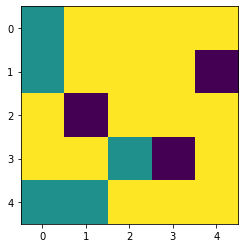

In [5]:
plt.imshow(model)
plt.show()